In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 12

In [2]:
!ls

path_to_dataset.txt          website_classification.ipynb
website_classification.csv


In [3]:
df = pd.read_csv('website_classification.csv')
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [4]:
df.tail()

,Unnamed: 0,website_url,cleaned_website_text,Category
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult


In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.index.name = 'row_id'
df.head()

,website_url,cleaned_website_text,Category
row_id,,,
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['website_url', 'cleaned_website_text', 'category'], dtype='object')

In [7]:
df.isna().sum()

website_url             0
cleaned_website_text    0
category                0
dtype: int64

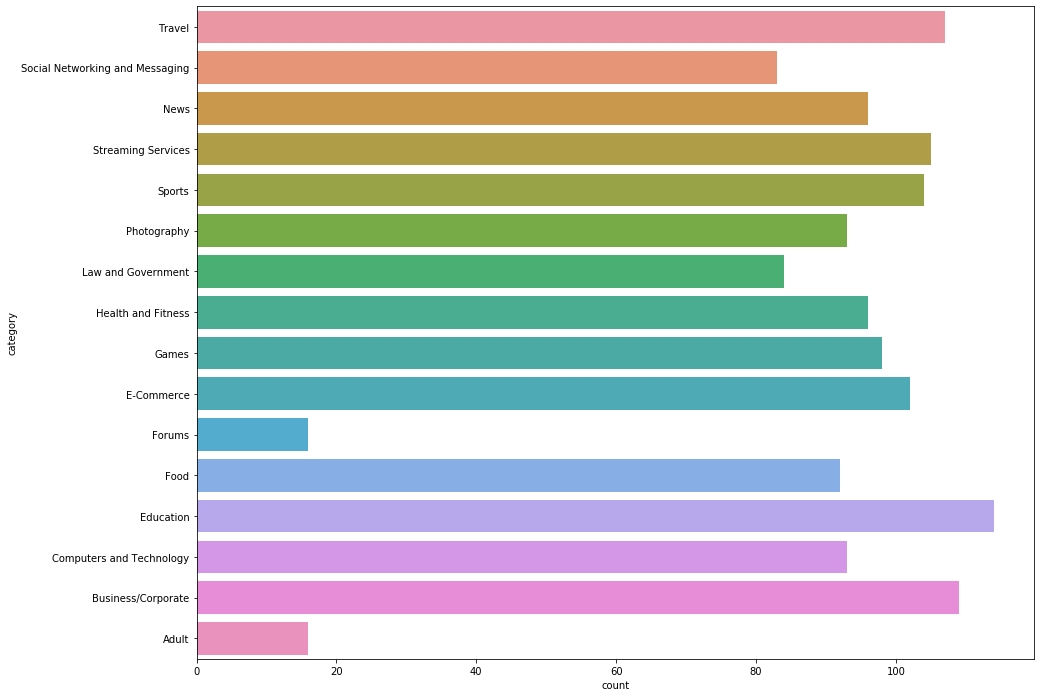

In [8]:
sns.countplot(y='category', data=df);

In [17]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [9]:
all_categories = df['category'].unique()
all_categories

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

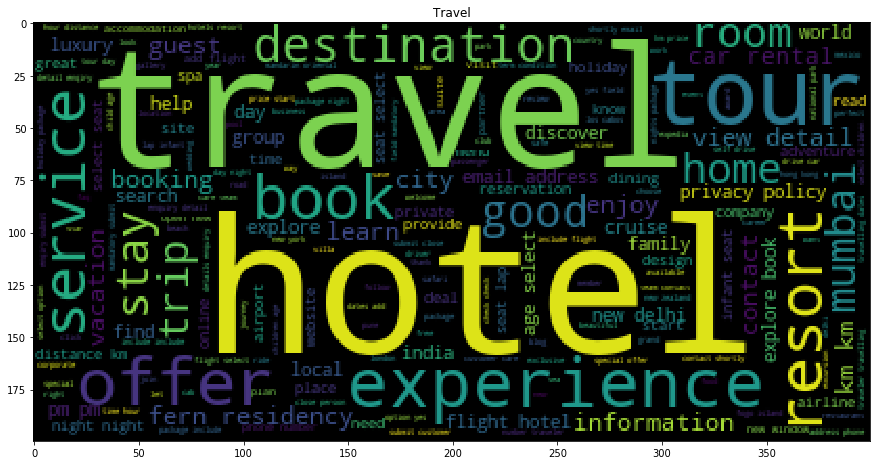

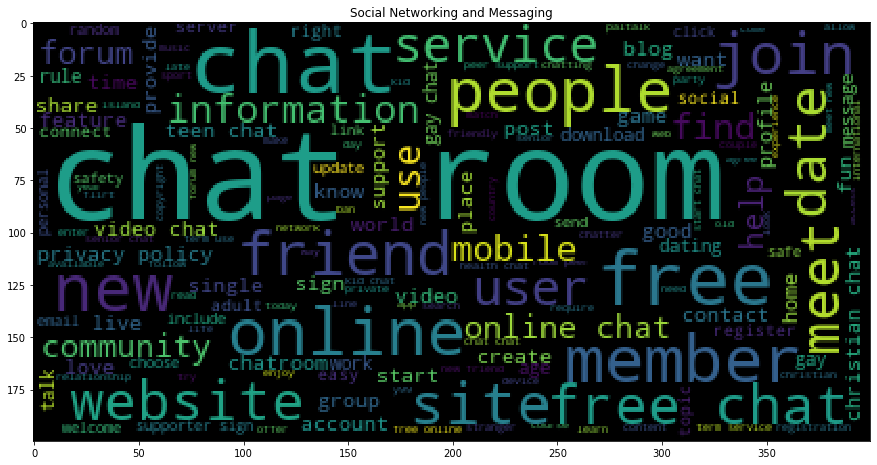

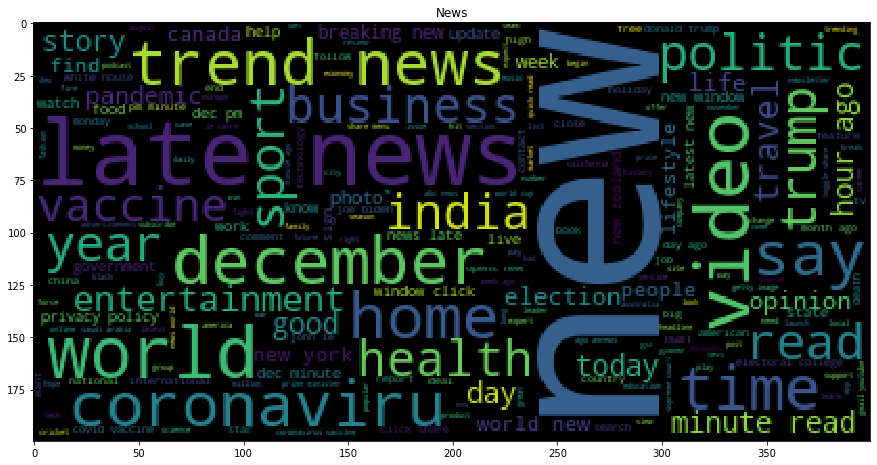

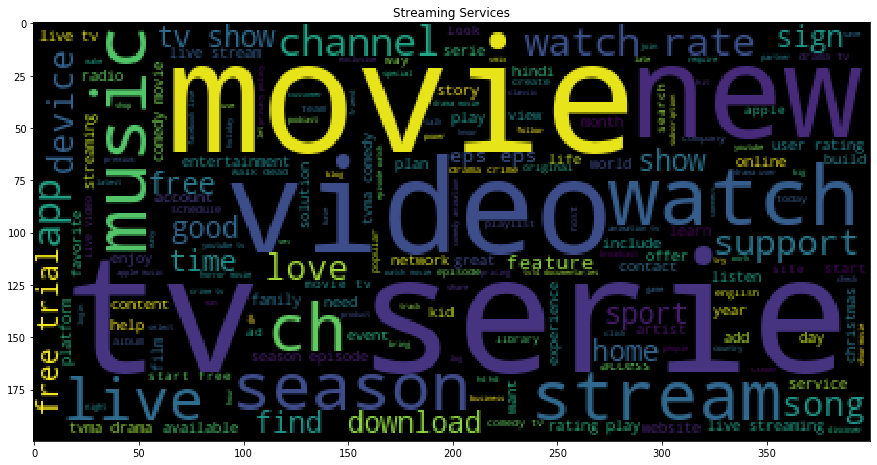

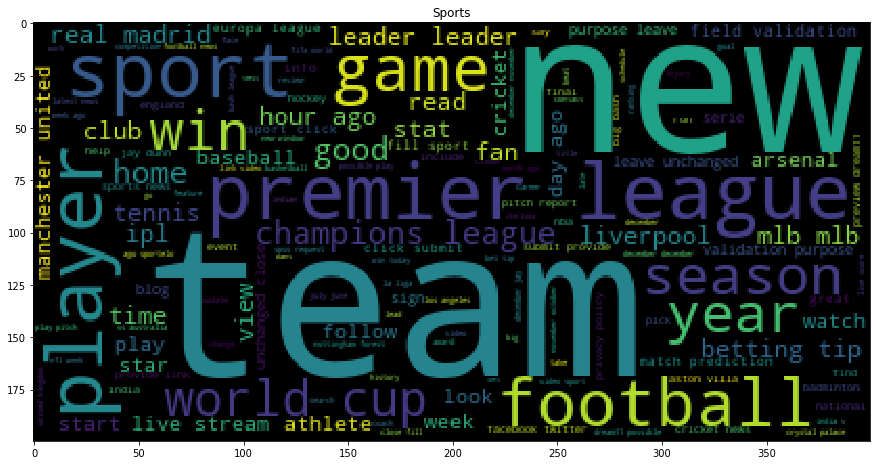

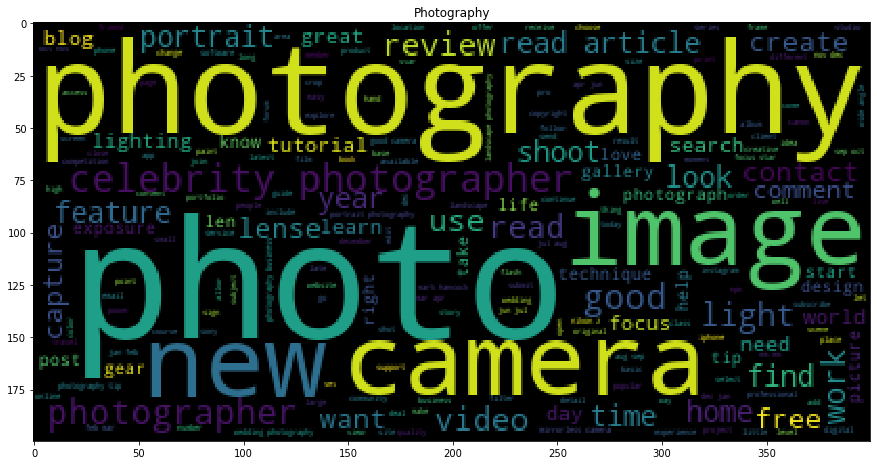

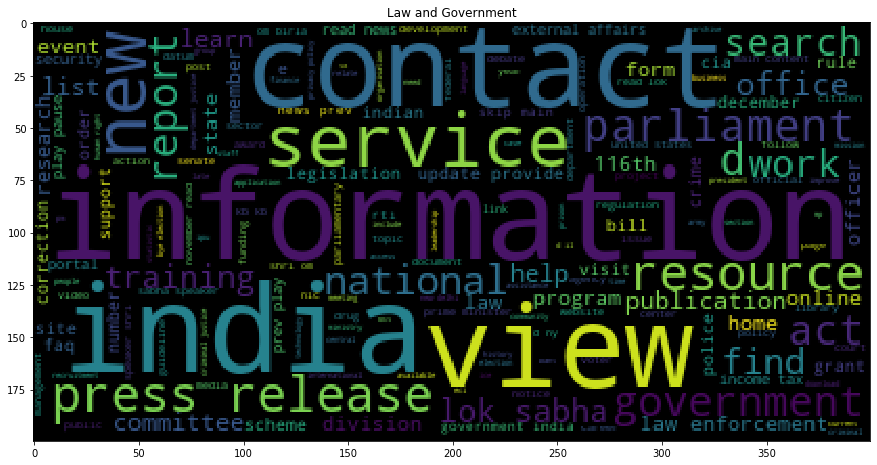

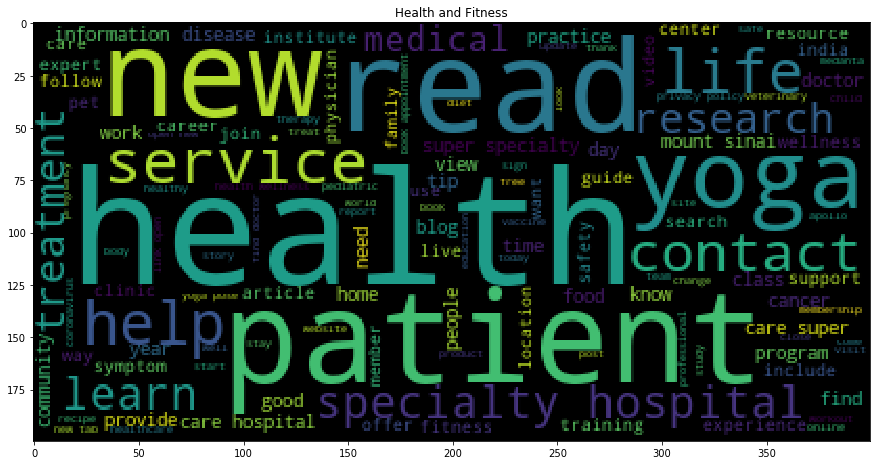

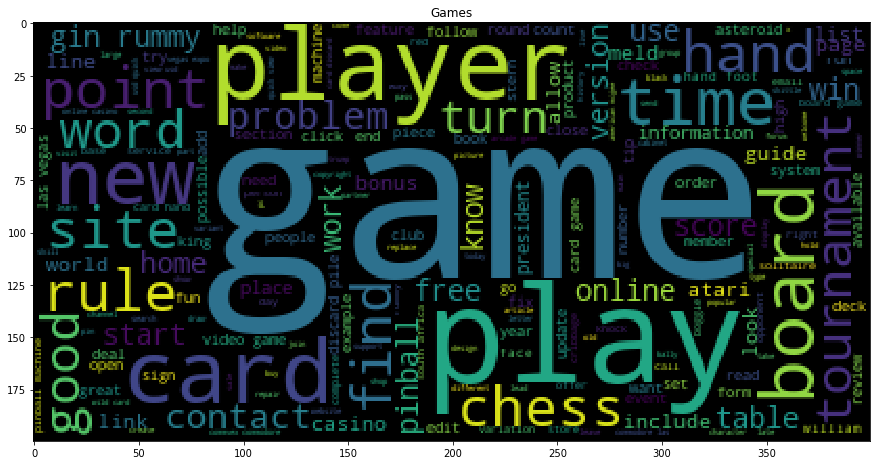

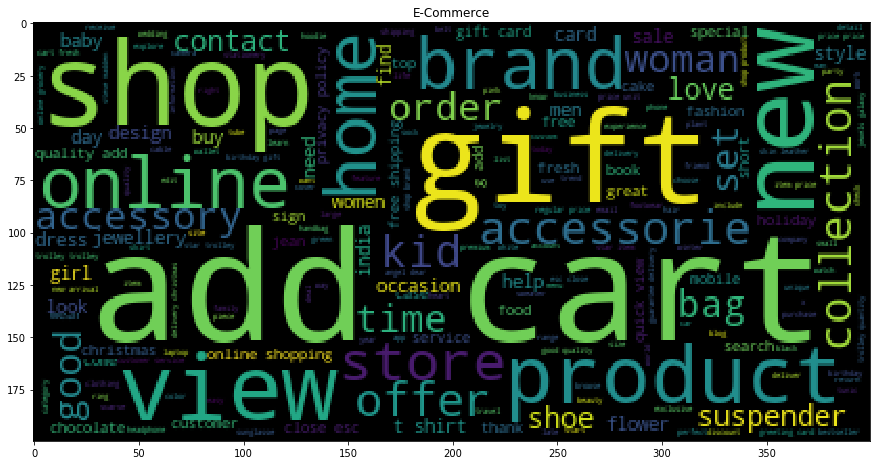

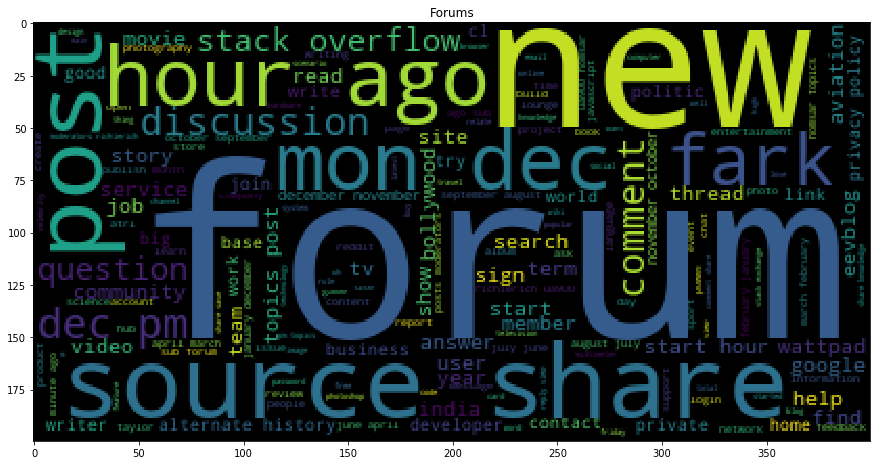

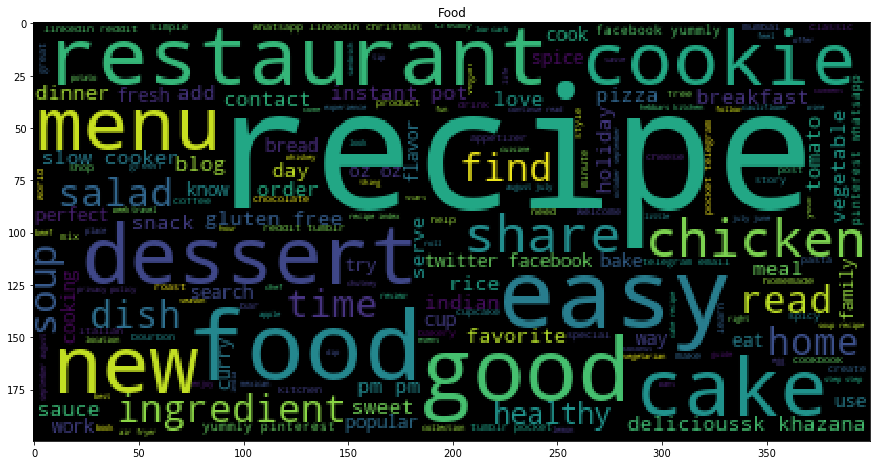

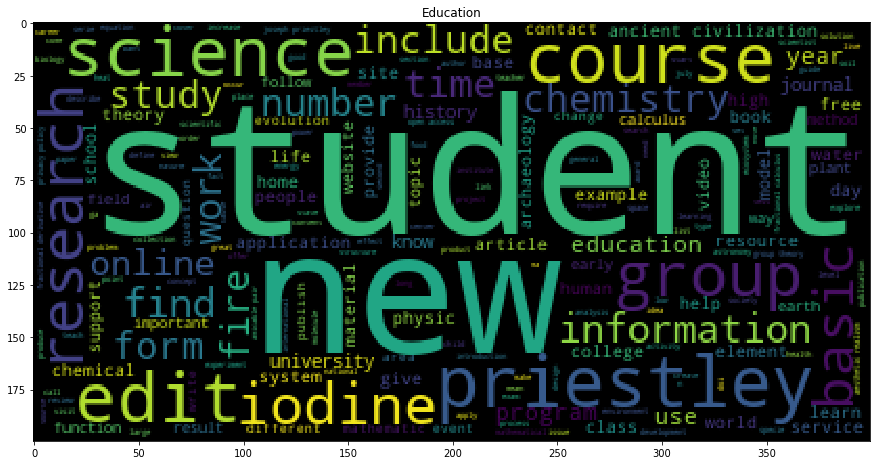

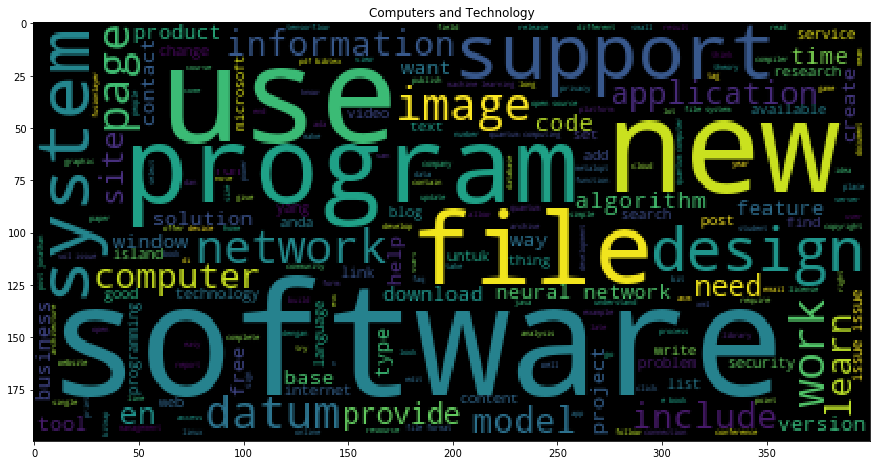

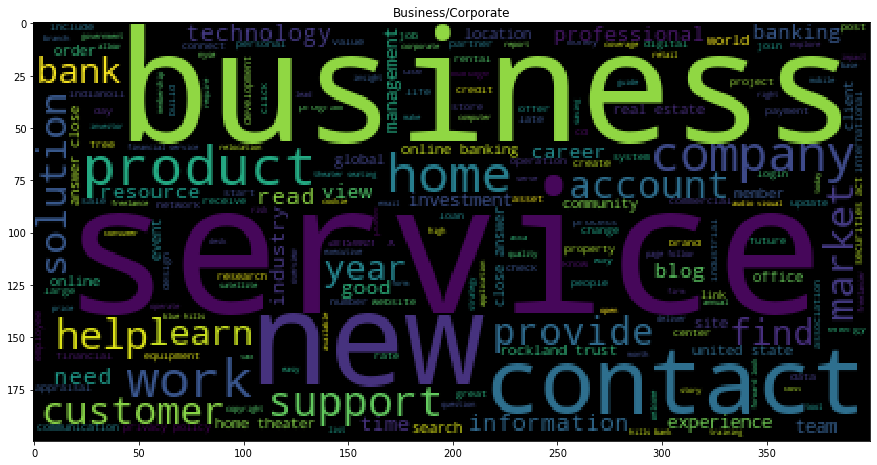

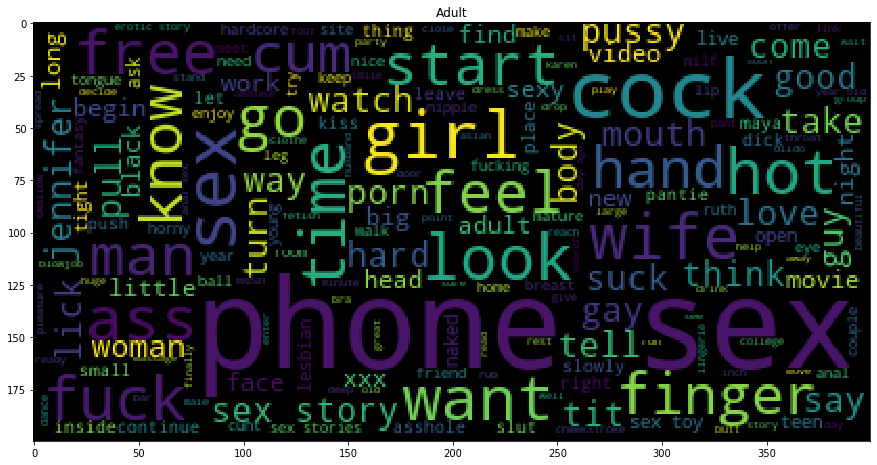

In [23]:
stop_words = set(STOPWORDS)

for _cat in all_categories:
#     print('categories =', _cat)
    _df = df[df.category == _cat]
    text = _df['cleaned_website_text'].values
    
    cloud_words = WordCloud(stopwords=stop_words).generate(' '.join(text))
    plt.figure()
    plt.title(_cat)
    plt.imshow(cloud_words)

In [ ]:
# create new features
df['url'] = df['website_url'].apply(lambda x: x.split('?')[0])
df['len_url'] = df['url'].apply(lambda x: len(x))
df['count_words'] = df['cleaned_website_text'].apply(lambda x: len(x.split(' ')))
df['count_unique_words'] = df['cleaned_website_text'].apply(lambda x: len(set(x.split(' '))))

In [ ]:
df.head()